# Loading in dataset:


In [ ]:
# Install Kaggle
!pip install -q kaggle

In [ ]:
# Upload kaggle key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hugomerkens","key":"7b460225039881d76ff98c96f910de02"}'}

In [ ]:
# Create a Kaggle folder
! mkdir ~/.kaggle

In [ ]:
# Copy the kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d projectlzp201910094/applescablds

100% 3.22G/3.22G [01:05<00:00, 90.0MB/s]
100% 3.22G/3.22G [01:05<00:00, 52.9MB/s]


In [ ]:
!unzip applescablds.zip

Archive:  applescablds.zip
  inflating: AppleScabLDs/Healthy/20200714_161252.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161258.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161308.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161331.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161340.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161425.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161451.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161509.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161515.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161530.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161537.jpg  
  inflating: AppleScabLDs/Healthy/20200714_161540.jpg  
  inflating: AppleScabLDs/Healthy/20200714_162126.jpg  
  inflating: AppleScabLDs/Healthy/20200714_162143.jpg  
  inflating: AppleScabLDs/Healthy/20200714_162150.jpg  
  inflating: AppleScabLDs/Healthy/IMG_20200617_090952.jpg  
  inflating: AppleScabLDs/Healthy/IMG_20200617_091007.jpg  
  inflating: 

In [ ]:
import os

source_path = '/content/AppleScabLDs'

source_path_healthy = os.path.join(source_path, 'Healthy')
source_path_scab = os.path.join(source_path, 'Scab')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_healthy))} images of healthy.")
print(f"There are {len(os.listdir(source_path_scab))} images of scab.")

print()
print(source_path_healthy)
print(source_path_scab)

There are 207 images of healthy.
There are 983 images of scab.

/content/AppleScabLDs/Healthy
/content/AppleScabLDs/Scab


In [ ]:
healthy_names = os.listdir(source_path_healthy)
print(healthy_names[:10])

scab_names = os.listdir(source_path_scab)
print(scab_names[:10])

['P1130526.JPG', 'IMG_20200617_094757.jpg', 'P1130546.JPG', 'IMG_6622.JPG', 'P1130523.JPG', '20200714_161252.jpg', 'IMG_6425.JPG', 'P1130543.JPG', 'IMG_5829.JPG', '20200714_161451.jpg']
['P1130271.JPG', 'IMG_7510.JPG', 'IMG_6607.JPG', 'IMG_8836.JPG', 'P1130708.JPG', 'IMG_6442.JPG', 'IMG_7832.JPG', 'P1130736.JPG', 'P1130290.JPG', 'IMG_7586.JPG']


# Data visualization:

## Show some pictures of healty fruits and fruits with scab.



In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 2x4 configuration
nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0

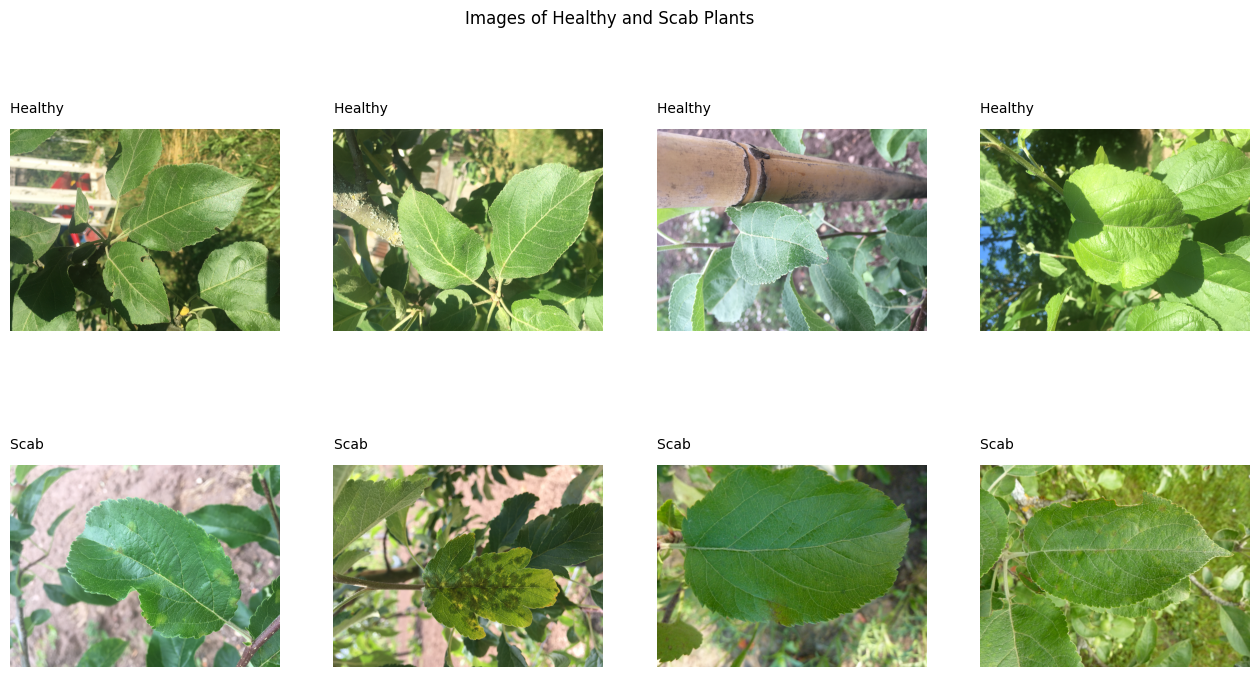

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

import random

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_healthy_pix = [os.path.join(source_path_healthy, fname) 
                for fname in healthy_names[pic_index-4:pic_index]] # if using -8 we get double the pictures
next_scab_pix = [os.path.join(source_path_scab, fname) 
                for fname in scab_names[pic_index-4:pic_index]] # if using -8 we get double the pictures

for i, img_path in enumerate(next_healthy_pix+next_scab_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

  if img_path in next_healthy_pix:
    label = 'Healthy \n'
  else:
    label = 'Scab \n'

  # Add the label as text to the subplot
  plt.text(0, 0, label, ha='left')

  plt.suptitle('Images of Healthy and Scab Plants')

#plt.savefig('applescab leaves.png')
plt.show()

In [ ]:
# from google.colab import files
#files.download("applescab leaves.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Show class distribution.


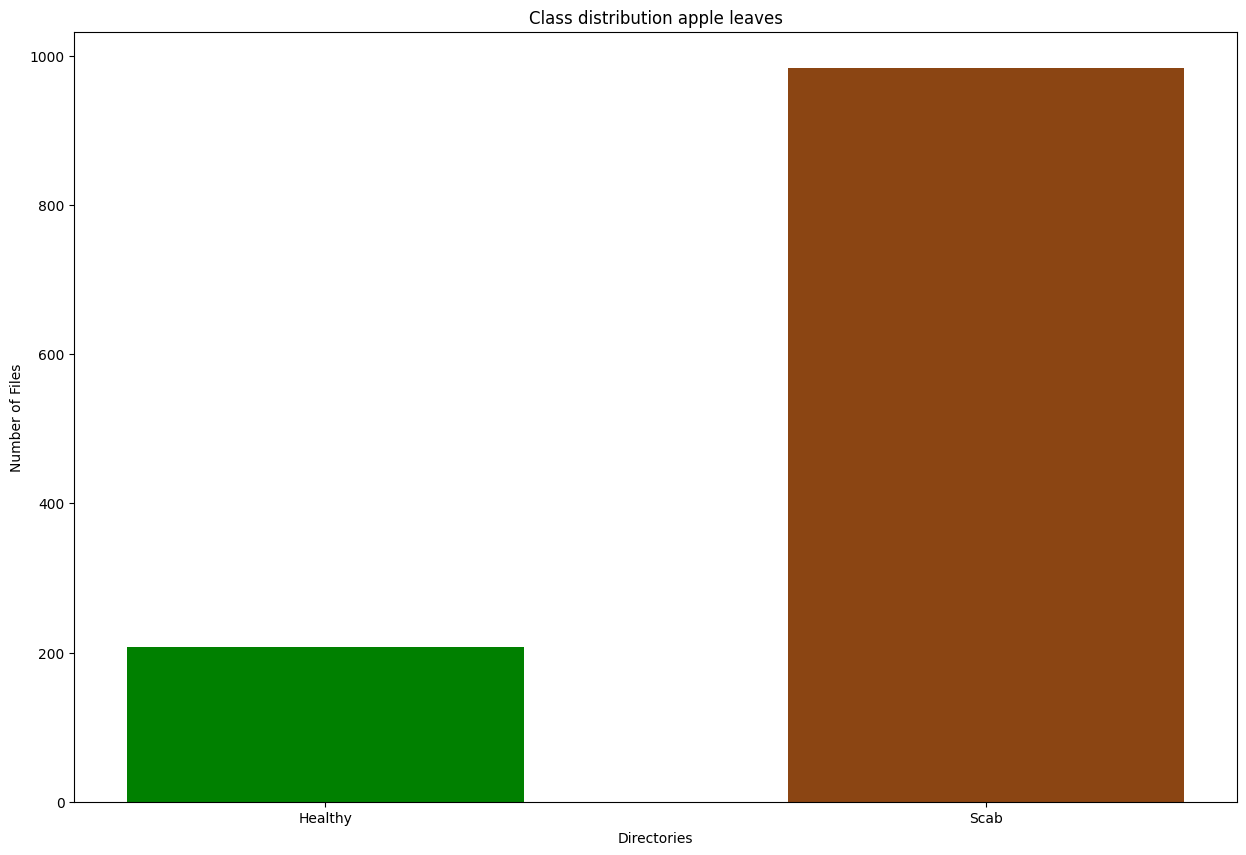

In [ ]:
# class distribution:
import numpy as np
import matplotlib.pyplot as plt

n_healthy = len(os.listdir(source_path_healthy))
n_scab = len(os.listdir(source_path_scab))

# Create a bar plot
labels = ['Healthy', 'Scab']
values = [n_healthy, n_scab]

colors = ['green', 'saddlebrown']

plt.figure(figsize = (15, 10))
plt.bar(labels, values, color=colors, width=0.6, align='center')
plt.title('Class distribution apple leaves')
plt.xlabel('Directories')
plt.ylabel('Number of Files')
#plt.savefig('Class distribution apple leaves.png')
plt.show()

In [ ]:
# from google.colab import files
#files.download("Class distribution apple leaves.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Show the min and max resolution of images and their color mode.

In [ ]:
from PIL import Image

# open the image file
img = Image.open('AppleScabLDs/Scab/IMG_7578.JPG')

# get the resolution
width, height = img.size
depth = img.mode

print(f"Image resolution: {width}x{height} and the image type is {depth}\n")


dataset_dir = '/content/AppleScabLDs'
dirs = ['Scab', 'Healthy']

# Initialize maximum and minimum values to very small and large numbers
max_width = float('-inf')
max_height = float('-inf')
min_width = float('inf')
min_height = float('inf')

color_modes = []

for root, dirs, files in os.walk(dataset_dir):
    for filename in files:
        filepath = os.path.join(root, filename)
        with Image.open(filepath) as img:
            width, height = img.size
            mode = img.mode
            if width > max_width:
                max_width = width
            if height > max_height:
                max_height = height
            if width < min_width:
              min_width = width
            if height < min_height:
                min_height = height
            if mode not in color_modes:
              color_modes.append(mode)

        
print(f"Maximum width: {max_width}")
print(f"Maximum height: {max_height}")
print(f"Minimum width: {min_width}")
print(f"Minimum height: {min_height}")
print(color_modes)

Image resolution: 4032x3024 and the image type is RGB

Maximum width: 4160
Maximum height: 4160
Minimum width: 3120
Minimum height: 2736
['RGB']


# Divide dataset into training, validation and testset folders:

## Create train, validation and test directories.

In [ ]:
# Define root directory
root_dir = '/content/healthy_scab_LDs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Create_train_val_test_dirs
def create_train_val_test_dirs(root_path):

  # Training:
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)

  train_healthy_dir = os.path.join(train_dir, 'healthy')
  os.makedirs(train_healthy_dir)
  train_scab_dir = os.path.join(train_dir, 'scab')
  os.makedirs(train_scab_dir)

  # Validation:
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  
  validation_healthy_dir = os.path.join(validation_dir, 'healthy')
  os.makedirs(validation_healthy_dir)
  validation_scab_dir = os.path.join(validation_dir, 'scab')
  os.makedirs(validation_scab_dir)

  # train_val:
  train_val_dir = os.path.join(root_path, 'train_val')
  os.makedirs(train_val_dir)
  
  train_val_healthy_dir = os.path.join(train_val_dir, 'healthy')
  os.makedirs(train_val_healthy_dir)
  train_val_scab_dir = os.path.join(train_val_dir, 'scab')
  os.makedirs(train_val_scab_dir)

  # Test:
  test_dir = os.path.join(root_path, 'test')
  os.makedirs(test_dir)

  test_healthy_dir = os.path.join(test_dir, 'healthy')
  os.makedirs(test_healthy_dir)
  test_scab_dir = os.path.join(test_dir, 'scab')
  os.makedirs(test_scab_dir)

  pass
  

try:
  create_train_val_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

/content/healthy_scab_LDs/training
/content/healthy_scab_LDs/validation
/content/healthy_scab_LDs/train_val
/content/healthy_scab_LDs/test
/content/healthy_scab_LDs/training/scab
/content/healthy_scab_LDs/training/healthy
/content/healthy_scab_LDs/validation/scab
/content/healthy_scab_LDs/validation/healthy
/content/healthy_scab_LDs/train_val/scab
/content/healthy_scab_LDs/train_val/healthy
/content/healthy_scab_LDs/test/scab
/content/healthy_scab_LDs/test/healthy


## Split the data into training, validation and test sets and save them to the previously created directories.

In [ ]:
import os
import random
import shutil

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TRAIN_VAL_DIR, TESTING_DIR, SPLIT_RATIO=(0.6, 0.2, 0.2)):
  
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

  # Ratios for train, val and testset size
  training_split_size = SPLIT_RATIO[0]
  validation_split_size = SPLIT_RATIO[1]
  testing_split_size = SPLIT_RATIO[2]

  # Calculating index

  training_length = int(len(files) * training_split_size)
  validation_length = int(len(files) * validation_split_size)
  
  shuffled_set = random.sample(files, len(files))

  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[training_length: (training_length + validation_length)]
  testing_set = shuffled_set[(training_length + validation_length):]

  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    shutil.copyfile(src_file, dest_file)
    
  for filename in validation_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    shutil.copyfile(src_file, dest_file)

  train_val_set = training_set + validation_set
  for filename in train_val_set:
      src_file = os.path.join(SOURCE_DIR, filename)
      dest_file = os.path.join(TRAIN_VAL_DIR, filename)
      shutil.copyfile(src_file, dest_file)
  
  for filename in testing_set:
    src_file = os.path.join(SOURCE_DIR, filename)
    dest_file = os.path.join(TESTING_DIR, filename)
    shutil.copyfile(src_file, dest_file)


  pass

## Split the data using the split function writen above and check that the data has been split appropriately.

In [ ]:
# Test your split_data function

# Define paths
Healthy_SOURCE_DIR = '/content/AppleScabLDs/Healthy/'
Scab_SOURCE_DIR = '/content/AppleScabLDs/Scab/'

TRAINING_DIR = '/content/healthy_scab_LDs/training/'
VALIDATION_DIR = '/content/healthy_scab_LDs/validation/'
TRAIN_VAL_DIR = '/content/healthy_scab_LDs/train_val/'
TESTING_DIR = '/content/healthy_scab_LDs/test'

TRAINING_Healthy_DIR = os.path.join(TRAINING_DIR, 'healthy/')
VALIDATION_Healthy_DIR = os.path.join(VALIDATION_DIR, 'healthy/')
TRAIN_VAL_Healthy_DIR = os.path.join(TRAIN_VAL_DIR, 'healthy/')
TESTING_Healthy_DIR = os.path.join(TESTING_DIR, "healthy/")

TRAINING_Scab_DIR = os.path.join(TRAINING_DIR, 'scab/')
VALIDATION_Scab_DIR = os.path.join(VALIDATION_DIR, 'scab/')
TRAIN_VAL_Scab_DIR = os.path.join(TRAIN_VAL_DIR, "scab/")
TESTING_Scab_DIR = os.path.join(TESTING_DIR, 'scab/')

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(Healthy_SOURCE_DIR, TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TRAIN_VAL_Healthy_DIR, TESTING_Healthy_DIR)
split_data(Scab_SOURCE_DIR, TRAINING_Scab_DIR, VALIDATION_Scab_DIR, TRAIN_VAL_Scab_DIR, TESTING_Scab_DIR)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f'\n\nOriginal healthy directory has {len(os.listdir(Healthy_SOURCE_DIR))} images')
print(f'Original scab directory has {len(os.listdir(Scab_SOURCE_DIR))} images\n')

# Training and validation splits. Check that the number of images matches the expected output.
print('Healthy dir')
print(f'There are {len(os.listdir(TRAINING_Healthy_DIR))} images for training')
print(f'There are {len(os.listdir(VALIDATION_Healthy_DIR))} images for validation')
print(f'There are {len(os.listdir(TESTING_Healthy_DIR))} images for testing')
print(f'There are {len(os.listdir(TRAIN_VAL_Healthy_DIR))} images for train_val')
print()

print('Scab dir')
print(f'There are {len(os.listdir(TRAINING_Scab_DIR))} images for training')
print(f'There are {len(os.listdir(VALIDATION_Scab_DIR))} images for validation')
print(f'There are {len(os.listdir(TESTING_Scab_DIR))} images for testing')
print(f'There are {len(os.listdir(TRAIN_VAL_Scab_DIR))} images for train_val')



Original healthy directory has 207 images
Original scab directory has 983 images

Healthy dir
There are 124 images for training
There are 41 images for validation
There are 42 images for testing
There are 165 images for train_val

Scab dir
There are 589 images for training
There are 196 images for validation
There are 198 images for testing
There are 785 images for train_val


# Save the dataset to Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/healthy_scab_LDs/ "/content/drive/MyDrive/Thesis code/"